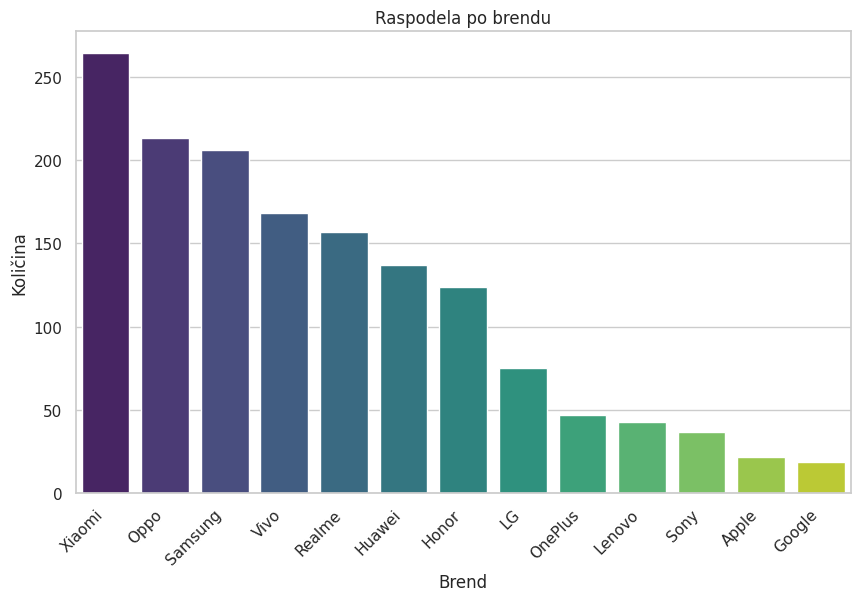

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


dataSkup = pd.read_csv('/content/sample_data/cleaned_all_phones.csv')

dataSkup.columns,len(dataSkup.columns),dataSkup.shape

dataSkup.duplicated().sum()

#==================Grafik 1
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='brand', data=dataSkup, order=dataSkup['brand'].value_counts().index, palette="viridis")
plt.xlabel('Brend')
plt.ylabel('Količina')
plt.title('Raspodela po brendu')
plt.xticks(rotation=45, ha="right")
plt.show()


In [3]:
#======================Kolicina telefona po Brendu
trazeni_modeli = ['Xiaomi', 'Oppo', 'Samsung', 'Vivo', 'Realme', 'Huawei', 'Honor', 'LG', 'OnePlus', 'Lenovo', 'Sony', 'Apple', 'Google']

rezultati_po_modelu = pd.DataFrame(columns=['Brend', 'Količina'])

for trazeni_model in trazeni_modeli:
    trenutni_model_df = dataSkup[dataSkup['brand'].str.contains(trazeni_model, case=False)]

    rezultati_trenutnog_modela = trenutni_model_df.groupby('brand')['brand'].count().reset_index(name='Količina')
    rezultati_po_modelu = pd.concat([rezultati_po_modelu, rezultati_trenutnog_modela], ignore_index=True)

print("Količina telefona po brendu:")
print(rezultati_po_modelu)

ukupna_kolicina_svih_telefona = rezultati_po_modelu['Količina'].sum()
print(f"Ukupna količina svih telefona je: {ukupna_kolicina_svih_telefona}")

Količina telefona po brendu:
   Brend Količina    brand
0    NaN      264   Xiaomi
1    NaN      213     Oppo
2    NaN      206  Samsung
3    NaN      168     Vivo
4    NaN      157   Realme
5    NaN      137   Huawei
6    NaN      124    Honor
7    NaN       75       LG
8    NaN       47  OnePlus
9    NaN       43   Lenovo
10   NaN       37     Sony
11   NaN       22    Apple
12   NaN       19   Google
Ukupna količina svih telefona je: 1512


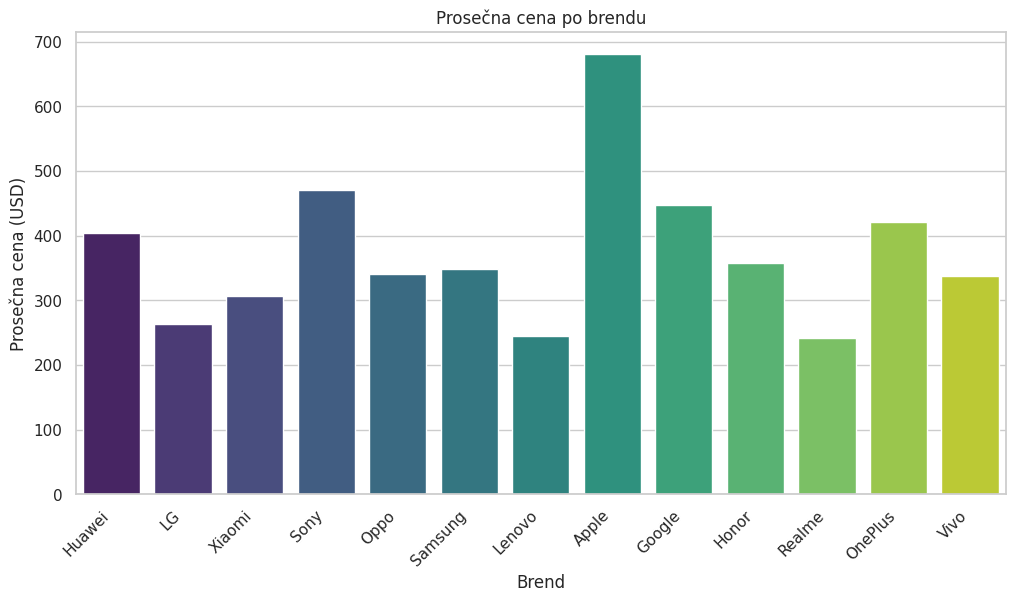

In [4]:
#===============Brend x CENA
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price(USD)', data=dataSkup, ci=None, palette="viridis")
plt.xlabel('Brend')
plt.ylabel('Prosečna cena (USD)')
plt.title('Prosečna cena po brendu')
plt.xticks(rotation=45, ha="right")
plt.show()

Text(0.5, 1.0, 'Cena telefona prema sistemu')

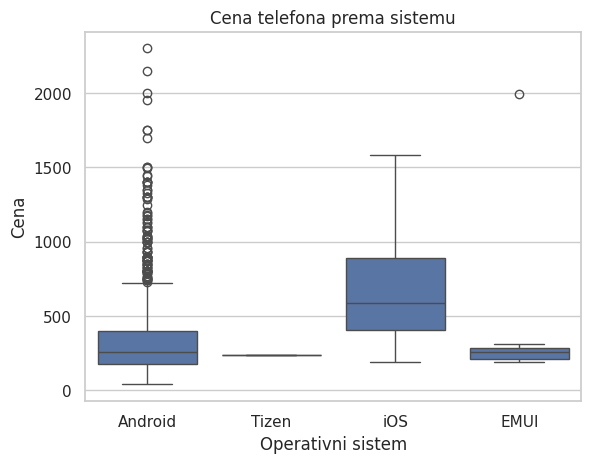

In [7]:
#================Telefon prema operativnom sistemu, grafik
dataSkup['os'].value_counts()
recnik = {
    'Android 8.1': 'Android 8.0',
    'Android 12L': 'Android 12',
    'Android 9.0 Pie': 'Android 9.0',
    'Android 7.1.1': 'Android 7.0',
    'Android 7.1': 'Android 7.0',
    'Android 7.1.2': 'Android 7.0',
    'Android 7.0.1': 'Android 7.0',
    'Android 8.0 Oreo': 'Android 8.0',
    'Android 8.1 Oreo': 'Android 8.0',
    'Android 6': 'Android 6.0',
    'Android 6.0.1': 'Android 6.0',
    'Android 12 or 13': 'Android 12',
    'Android 10/ Android 11': 'Android 10',
    'iOS 15.4': 'iOS 15',
    'iOS 14.1': 'iOS 14',
    'iOS 11.1.1': 'iOS 11'
}

dataSkup['os'] = dataSkup['os'].replace(recnik)

dataSkup['os'].value_counts()

dataSkup[['os_name', 'os_version']] = dataSkup['os'].str.split(n=1, expand=True)

dataSkup.drop(columns=['os'], inplace=True)
dataSkup.head()

sns.boxplot(x='os_name', y='price(USD)', data=dataSkup)

plt.xlabel('Operativni sistem')
plt.ylabel('Cena')
plt.title('Cena telefona prema sistemu')

Text(0, 0.5, 'Gustina')

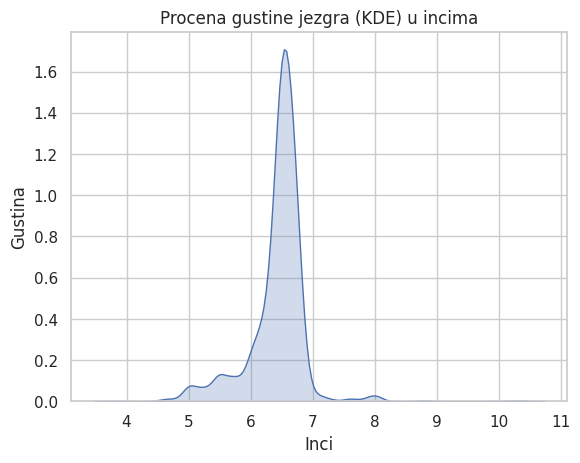

In [8]:
#=====================EKRAN
sns.kdeplot(dataSkup['inches'], shade=True)
plt.title('Procena gustine jezgra (KDE) u incima')
plt.xlabel('Inci')
plt.ylabel('Gustina')

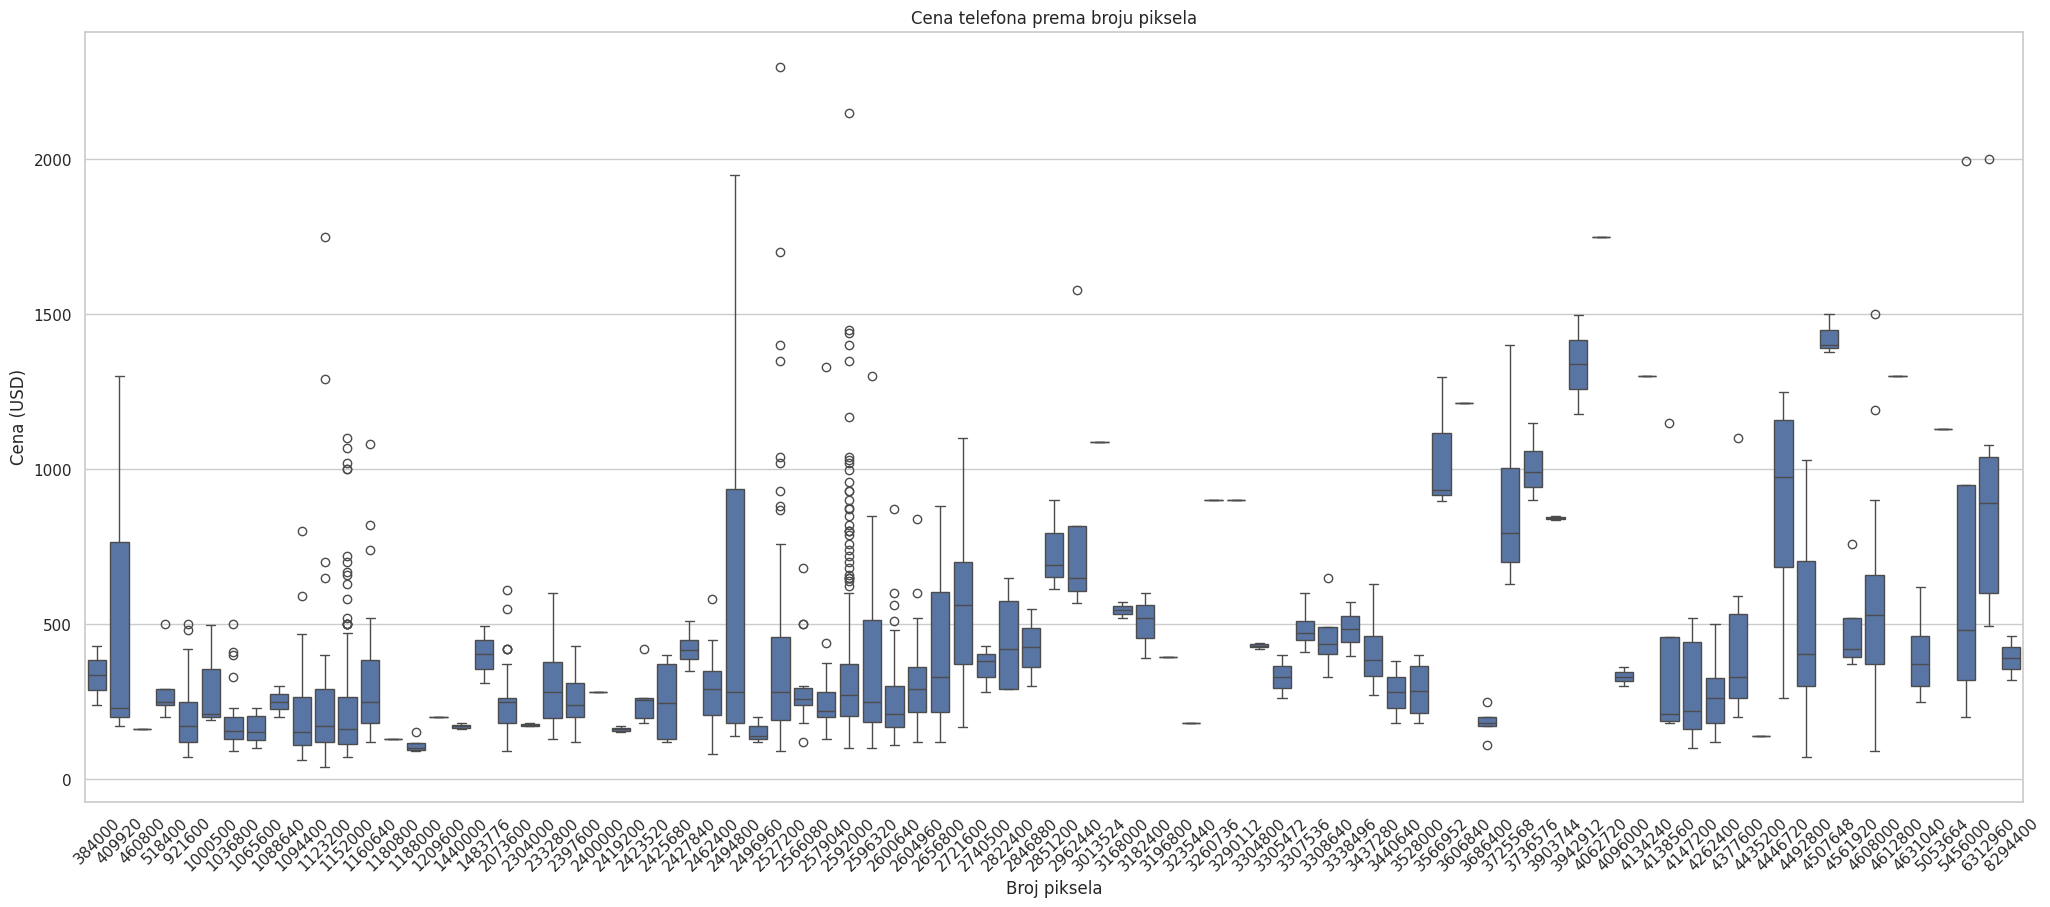

Index(['phone_name', 'brand', 'inches', 'battery', 'battery_type', 'ram(GB)',
       'announcement_date', 'weight(g)', 'storage(GB)', 'video_720p',
       'video_1080p', 'video_4K', 'video_8K', 'video_30fps', 'video_60fps',
       'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps',
       'price(USD)', 'os_name', 'os_version', 'number_of_pixels'],
      dtype='object')

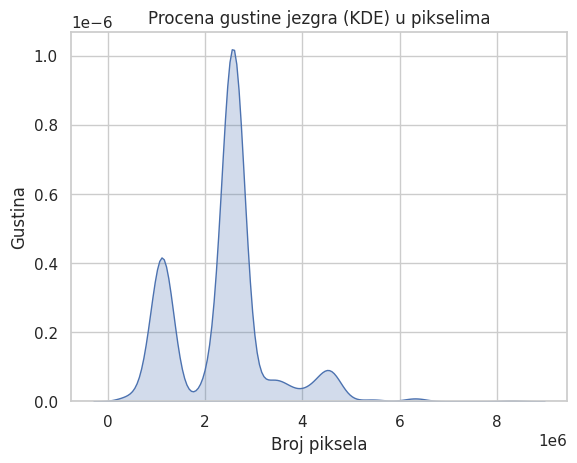

In [9]:
#=============REZOLUCIJA EKRANA
def calculate_pixels(resolution):
    try:
        h, w = map(int, resolution.split('x'))
        return h * w
    except ValueError:
        return None

dataSkup['number_of_pixels'] = dataSkup['resolution'].apply(calculate_pixels)
dataSkup.drop(columns=['resolution'], inplace=True)
dataSkup.head()

plt.figure(figsize=(25, 10))
sns.boxplot(x='number_of_pixels', y='price(USD)', data=dataSkup, orient='v')
plt.title('Cena telefona prema broju piksela')
plt.ylabel('Cena (USD)')
plt.xlabel('Broj piksela')
plt.xticks(rotation=45)

plt.show()

sns.kdeplot(dataSkup['number_of_pixels'], shade=True)
plt.title('Procena gustine jezgra (KDE) u pikselima')
plt.xlabel('Broj piksela')
plt.ylabel('Gustina')


dataSkup.columns

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135],
 [Text(0, 0, '1821'),
  Text(1, 0, '1950'),
  Text(2, 0, '2000'),
  Text(3, 0, '2018'),
  Text(4, 0, '2050'),
  Text(5, 0, '2200'),
  Text(6, 0, '2227'),
  T

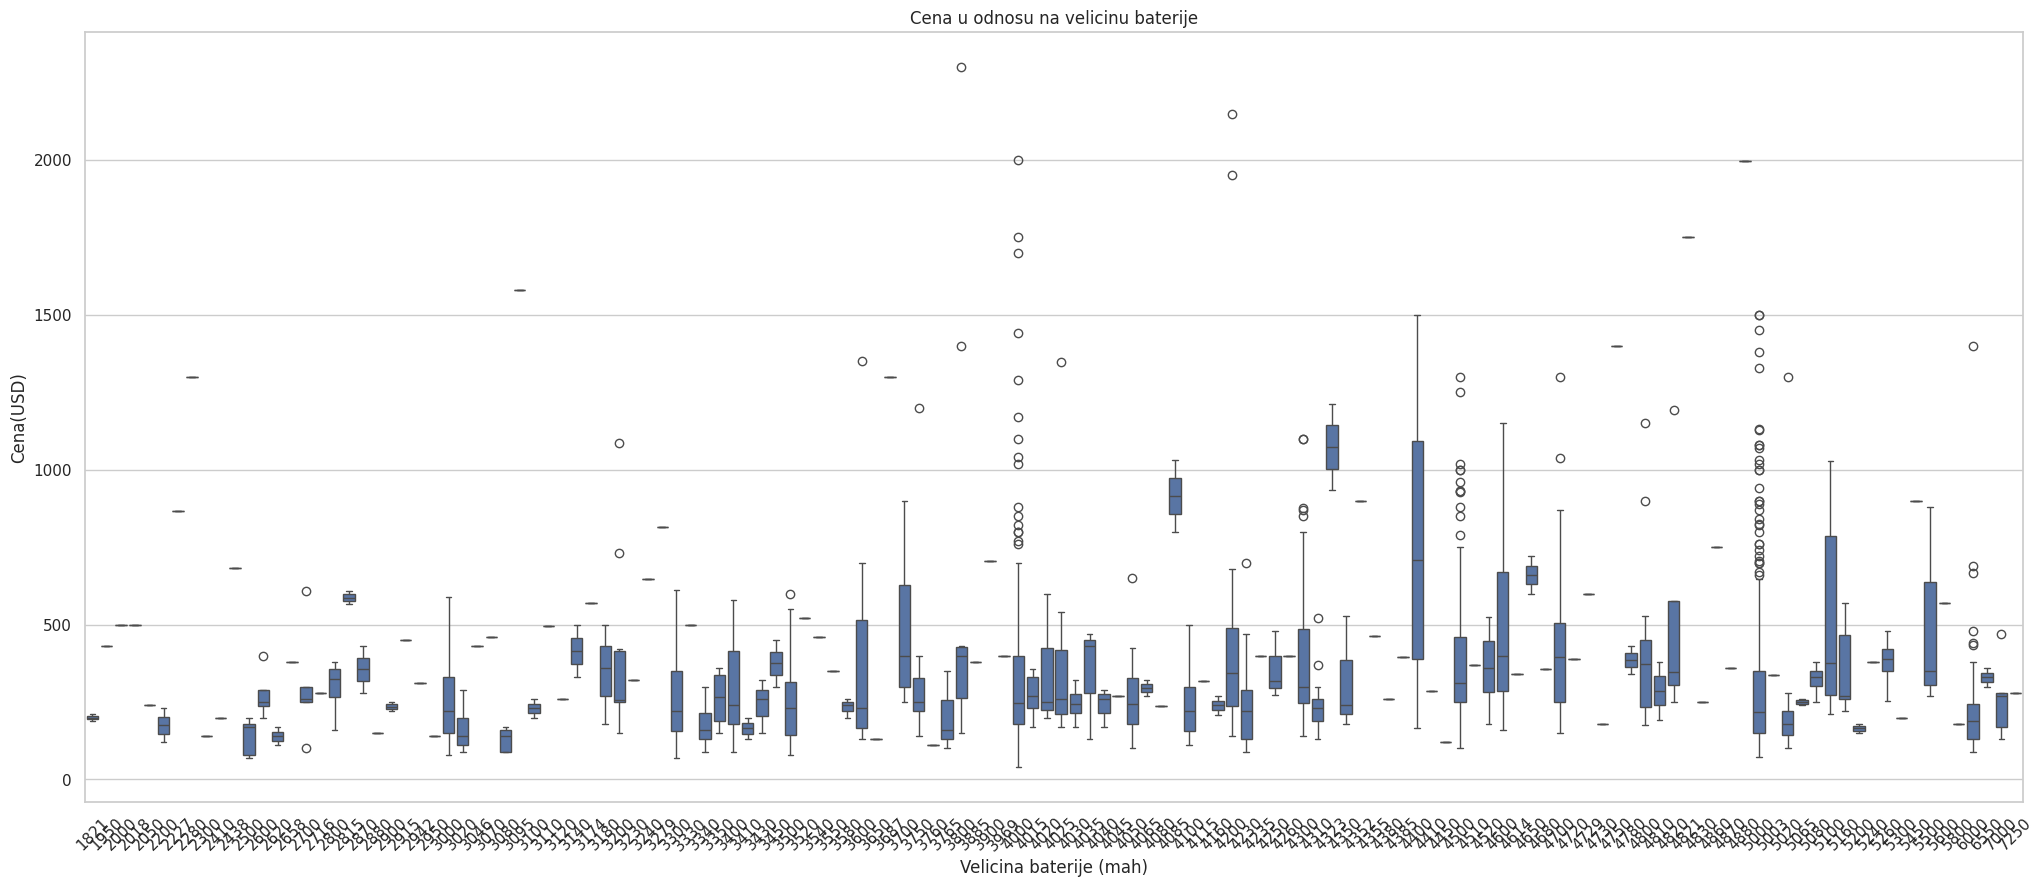

In [10]:
#============VELICINA BATERIJE
plt.figure(figsize=(25, 10))
sns.boxplot(x='battery', y='price(USD)', data=dataSkup, orient='v')
plt.title('Cena u odnosu na velicinu baterije')
plt.xlabel('Velicina baterije (mah)')
plt.ylabel('Cena(USD)')
plt.xticks(rotation=45)

Text(0, 0.5, 'Cena (USD)')

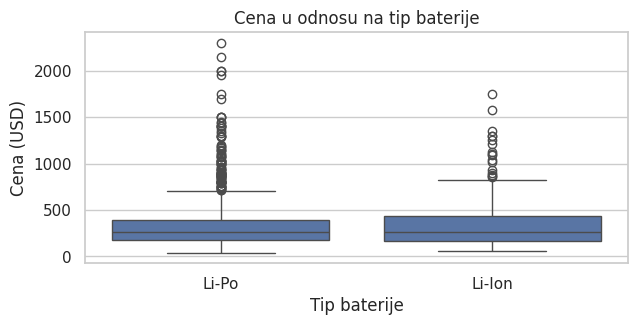

In [11]:
#================TIP BATERIJE
plt.figure(figsize=(7, 3))
sns.boxplot(x='battery_type', y='price(USD)', data=dataSkup)
plt.title('Cena u odnosu na tip baterije')
plt.xlabel('Tip baterije')
plt.ylabel('Cena (USD)')

Text(0, 0.5, 'Cena (USD)')

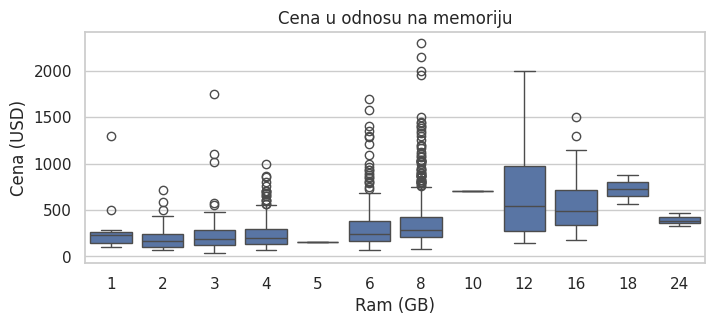

In [12]:
#================RAM MEMORIJA
plt.figure(figsize=(8, 3))
sns.boxplot(x='ram(GB)', y='price(USD)', data=dataSkup)
plt.title('Cena u odnosu na memoriju')
plt.xlabel('Ram (GB)')
plt.ylabel('Cena (USD)')

Text(0, 0.5, 'Cena(USD)')

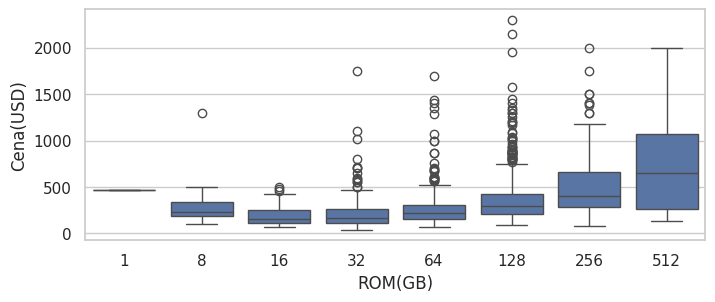

In [13]:
#================ROM MEMORIJA
plt.figure(figsize=(8, 3))
sns.boxplot(x='storage(GB)', y='price(USD)', data=dataSkup)
plt.xlabel('ROM(GB)')
plt.ylabel('Cena(USD)')

Text(0, 0.5, 'Cena (USD)')

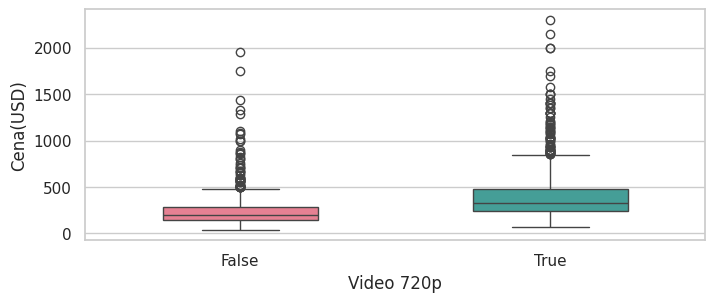

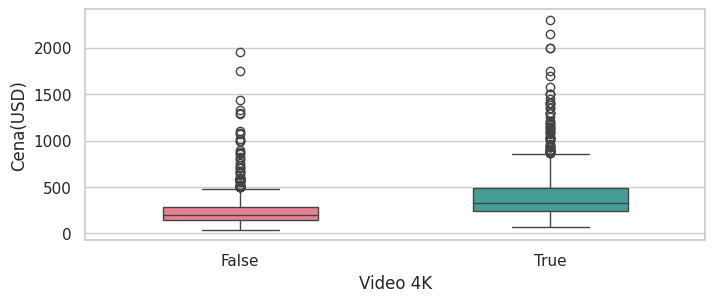

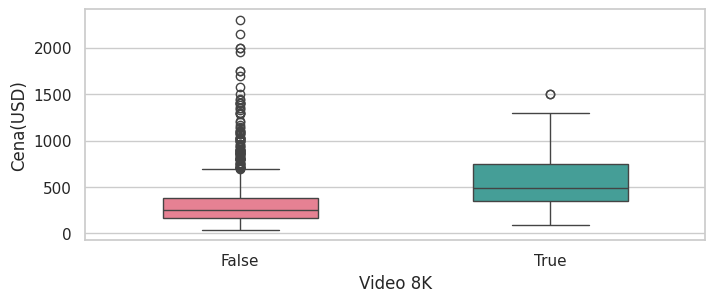

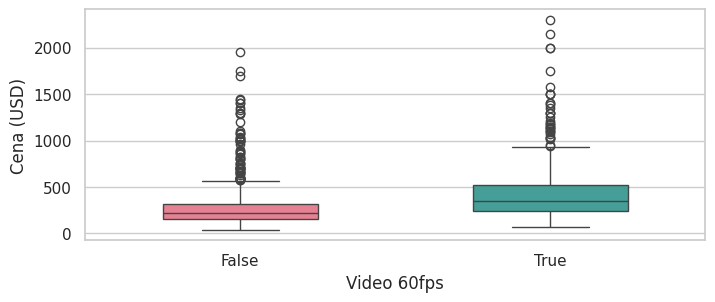

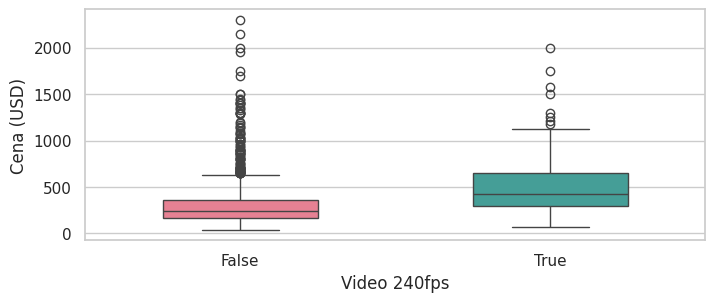

In [14]:
#================KAMERA
plt.figure(figsize=(8, 3))
sns.boxplot(x='video_720p', y='price(USD)', data=dataSkup, palette="husl", width=0.5)
plt.xlabel('Video 720p')
plt.ylabel('Cena(USD)')

plt.figure(figsize=(8, 3))
sns.boxplot(x='video_4K', y='price(USD)', data=dataSkup, palette="husl", width=0.5)
plt.xlabel('Video 4K')
plt.ylabel('Cena(USD)')

plt.figure(figsize=(8, 3))
sns.boxplot(x='video_8K', y='price(USD)', data=dataSkup,palette="husl", width=0.5)
plt.xlabel('Video 8K')
plt.ylabel('Cena(USD)')


plt.figure(figsize=(8, 3))
sns.boxplot(x='video_60fps', y='price(USD)', data=dataSkup, palette="husl", width=0.5)
plt.xlabel('Video 60fps')
plt.ylabel('Cena (USD)')

plt.figure(figsize=(8, 3))
sns.boxplot(x='video_240fps', y='price(USD)', data=dataSkup, palette="husl", width=0.5)
plt.xlabel('Video 240fps')
plt.ylabel('Cena (USD)')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126],
 [Text(0, 0, '130.0'),
  Text(1, 0, '135.0'),
  Text(2, 0, '137.0'),
  Text(3, 0, '139.0'),
  Text(4, 0, '140.0'),
  Text(5, 0, '141.0'),
  Text(6, 0, '142.0'),
  Text(7, 0, '143.0'),
  Text(8, 0, '144.0'),
  Text(9, 0, 

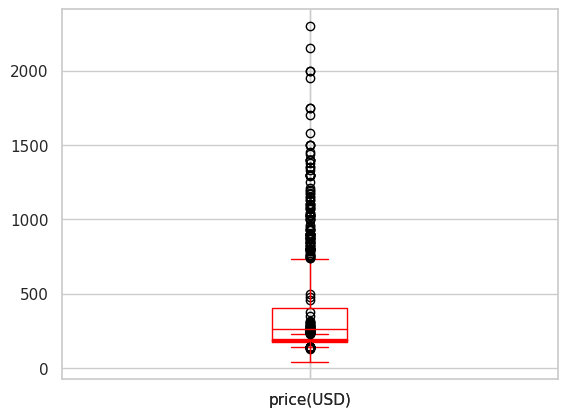

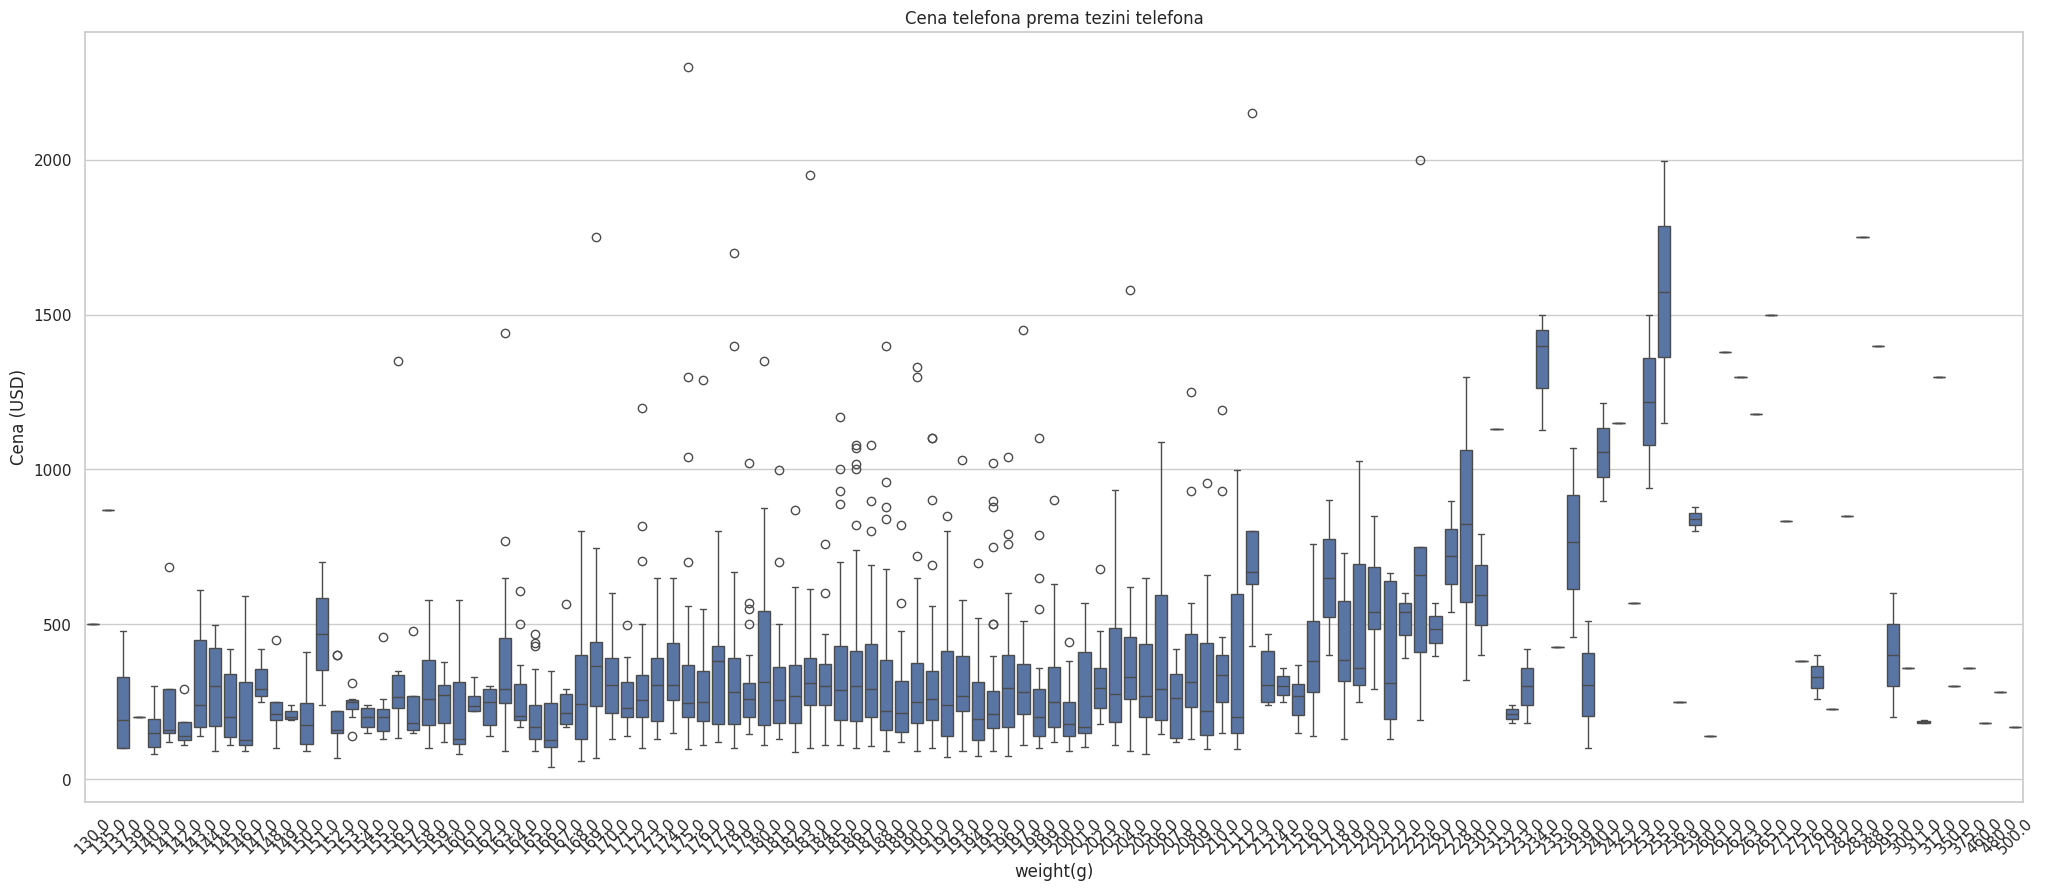

In [19]:
dataSkup.boxplot(['weight(g)'], color='red')

dataSkup.boxplot(['price(USD)'], color='red')

plt.figure(figsize=(25, 10))
sns.boxplot(x='weight(g)', y='price(USD)', data=dataSkup, orient='v')
plt.title('Cena telefona prema tezini telefona')
plt.ylabel('Cena (USD)')
plt.xlabel('weight(g)')
plt.xticks(rotation=45)